**import the retail with missing data**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
retail_data=pd.read_csv("retail_with_missing_data.csv")
retail_data.head()

,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,NaN,0.0
1,NaN,3045.0,4.757798,NaN,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,NaN,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0


analyse the null data

In [34]:
print(retail_data.isnull().sum())
print("\n duplicate items :",retail_data.duplicated().sum())

Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64

 duplicate items : 15


In [35]:
retail_data.describe()

,Price,Rating,Discount
count,4188.000000,2312.000000,3970.000000
mean,5016.970630,3.038293,24.516625
std,2839.984813,1.143074,14.347164
min,102.000000,1.000366,0.000000
25%,2628.250000,2.069490,12.000000
50%,4996.500000,3.082060,25.000000
75%,7418.000000,4.008620,37.000000
max,9999.000000,4.997818,49.000000


In [12]:
print((retail_data.isnull().sum() / len(retail_data)) * 100)    #percentage of missing values

Category    62.998624
Price        3.988996
Rating      46.996790
Stock       30.994956
Discount     8.986703
dtype: float64


*four steps should be used for handle missing values*                 
- 1.delete the rows / columns should have high null
- 2.Mean / mode / median  
- 3.apply classifier algorithm to predict 
- 4.apply unsupervised ML

In [15]:
#STEP 1
print("before remove the null column",retail_data.shape)
retail_data=retail_data.dropna()
print("After remove the null column",retail_data.shape)

before remove the null column (4362, 5)
After remove the null column (540, 5)


- by the method 1 that cause many data should be removed 
- it is apply for a large dataset with less null value columns 
- also ensure removing col is not affect the model or dataset

In [41]:
for col in retail_data.columns:
    print(f"columns : {col}")
    print(retail_data[col].sort_values().unique(),"\n")

columns : Category
<StringArray>
['A', 'B', 'C', 'D', nan]
Length: 5, dtype: str 

columns : Price
[ 102.  103.  105. ... 9997. 9999.   nan] 

columns : Rating
[1.0003662  1.00310289 1.00343663 ... 4.99299218 4.99781769        nan] 

columns : Stock
<StringArray>
['In Stock', 'Out of Stock', nan]
Length: 3, dtype: str 

columns : Discount
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. nan] 



In [57]:
retail_data["Category"]=retail_data.Category.fillna(retail_data["Category"].mode()[0])
retail_data["Stock"]=retail_data.Stock.fillna(retail_data["Stock"].mode()[0])

#mean - range is small  
retail_data["Discount"]=retail_data.Discount.fillna(retail_data["Discount"].mean())
retail_data["Rating"]=retail_data.Rating.fillna(retail_data["Rating"].mean())

#median - price range is high , it is scew
retail_data["Price"]=retail_data.Price.fillna(retail_data["Price"].median()) 

In [58]:
print("After mean,mode,median",retail_data.isnull().sum())

After mean,mode,median Category    0
Price       0
Rating      0
Stock       0
Discount    0
dtype: int64


**Random forest or any model that is suiltable for the dataset**

In [59]:
#STEP 3
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [110]:

le_category=LabelEncoder()
le_stock=LabelEncoder()

retail_data["Category"]=le_category.fit_transform(retail_data["Category"])
retail_data["Stock"]=le_category.fit_transform(retail_data["Stock"])


In [111]:
known=retail_data[retail_data["Rating"].notnull()]
unknown=retail_data[retail_data["Rating"].isnull()]
X_train=known.drop(columns="Rating")
y_train=known["Rating"]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [112]:
retail_data.loc[
    retail_data["Rating"].isnull(),
    "Rating"
] = model.predict(unknown[["Category", "Price", "Stock", "Discount"]])
not_null=retail_data


In [113]:
print("After classifier prediction:")
print(retail_data.isnull().sum())

After classifier prediction:
Category      0
Price       174
Rating        0
Stock         0
Discount    392
dtype: int64


**unsupervised - clustering - KNN**

In [ ]:
#step 3
not_null
X = not_null[["Price", "Rating", "Discount"]]
X

,Price,Rating,Discount
0,5548.0,1.870322,0.0
1,3045.0,4.757798,38.0
2,4004.0,2.940773,0.0
3,4808.0,1.492085,33.0
4,1817.0,2.844772,23.0
...,...,...,...
4357,4436.0,4.728335,49.0
4358,6236.0,3.508922,4.0
4359,3283.0,3.671180,9.0
4360,2999.0,4.425995,40.0


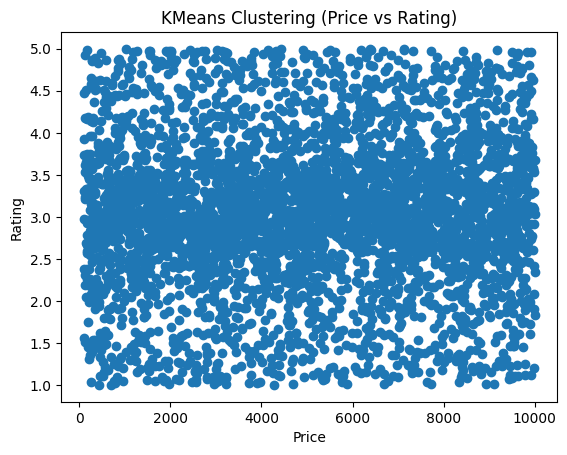

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features
X = not_null[["Price", "Rating", "Discount"]]
X = X.fillna(X.mean())
# Scale data (VERY IMPORTANT for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
not_null["Cluster"] = kmeans.fit_predict(X_scaled)

# Plot (Price vs Rating)
plt.figure()
plt.scatter(retail_data["Price"], retail_data["Rating"])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("KMeans Clustering (Price vs Rating)")
plt.show()


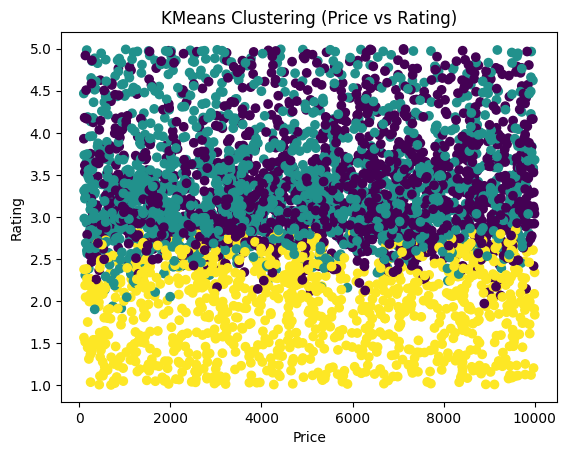

In [121]:
plt.figure()
plt.scatter(
    not_null["Price"],
    not_null["Rating"],
    c=not_null["Cluster"]
)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("KMeans Clustering (Price vs Rating)")
plt.show()


In [ ]:
print(not_null.groupby("Cluster")[["Price", "Rating", "Discount"]].mean())

               Price    Rating   Discount
Cluster                                  
0        5567.727273  3.383935  11.632558
1        4477.943884  3.414413  37.441465
2        5011.792308  1.933783  24.119658


: 

## Conclusion

- Statistical imputation works well for moderate missing data.
- RandomForest provides better predictive filling.
- KMeans shows natural grouping mainly based on Rating.
- Dropping rows is suitable only when missing percentage is very small.


**THE END**